**BÚSQUEDA TABÚ**
---

# Problema a resolver

$$U = \frac{204,165.5}{330 - 2T} + \frac{10,400}{T - 20}$$

# Implementación

Importación de librerías:

In [1]:
from matplotlib import pyplot as plt
import numpy as np 
from time import time

Definición de la función del problema:

In [14]:
#f = lambda t:  3 * (t ** 4) - 8 * (t ** 3) - 18 * (t ** 2)
f = lambda t:  5 * t ** 2 + 5

Definición de la derivada adelantada:

In [15]:
fp = lambda x, delta: (f(x + delta) - f(x)) / delta

Graficación del problema:

In [16]:
def plot_x(xmin, xmax, x):
    fx = f(x)
    fig1 = plt.figure(figsize = (15,8))
    plt.plot(x,fx);
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.grid(True)

Algoritmo:

In [17]:
xmin = -3
xmax = 5
x = np.linspace(xmin, xmax, 100)

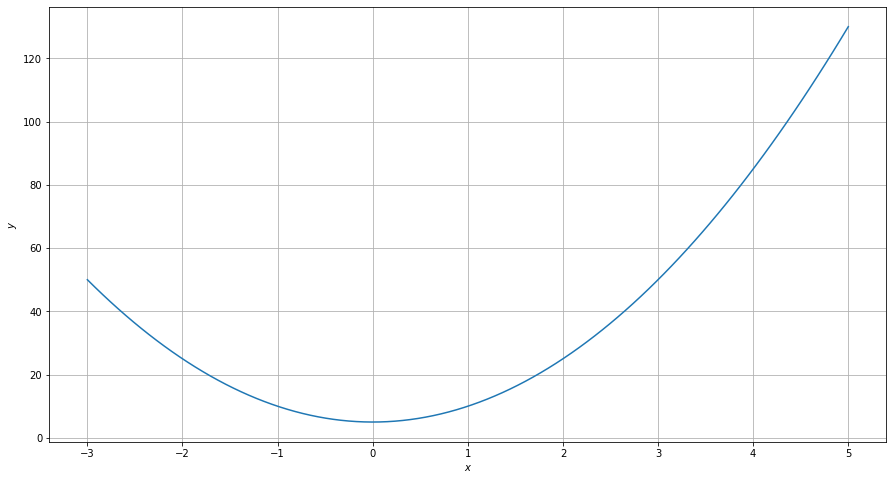

In [18]:
plot_x(xmin, xmax, x)

In [27]:
s_0 = x[np.random.randint(0, len(x))]
f_best = f(s_0)
s_best = s_0
tabu = np.array([s_0])
admissible = np.setdiff1d(x, np.array([s_0]))
epsilon = 0.001
delta = 0.001
intentos_sin_mejora = 10

for i in range(1, 100):
    s_new = admissible[np.random.randint(0, len(admissible))]
    f_new = f(s_new)
    if f_new < f_best:
        s_best_prev = s_best
        f_best = f_new
        s_best = s_new
        #print(f'{i} -> s_best_prev: {s_best_prev}, s_best: {s_best}')
        #print(f'{fp(s_best_prev, delta)} -> {fp(s_best, delta)}')
        # Si ya no hay diferencia significativa se sale del algoritmo.
        # Esto debería quitarse porque el algoritmo permite explorar más soluciones.
        #if abs(fp(s_best_prev, delta) - fp(s_best, delta)) <= epsilon:
        #    break
    else:
        intentos_sin_mejora -= 1
    tabu = np.append(tabu, s_new)
    admissible = np.setdiff1d(admissible, np.array([s_new]))
    
    if len(admissible) == 0 or intentos_sin_mejora == 0:
        break
        
print(f'Iteraciones: {i}')
print(f's_best: {s_best}')
print(f'f_best: {f_best}')
print(f'fp_best: {fp(s_best, delta)}')
print(f'Tabu: {len(tabu)}')
print(f'Admissible: {len(admissible)}')
print()


Iteraciones: 14
s_best: -0.010101010101009944
f_best: 5.000510152025304
fp_best: -0.09601010100990237
Tabu: 15
Admissible: 85

